# Draft Machine Learning Model with Sample Dataset

## 1. Linear Regression
### Sales based on Critic score
Predict game's sale based on critic score

Example: If critic score = 8, how likely will the sales be?

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df1 = pd.read_csv('Sample_Datasets/sample_critic_sales.csv')
df1.head(10)

,Critic_Score,Total_Sales
0,1.8,20.8
1,2.1,16.5
2,4.6,42.3
3,7.1,12.8
4,4.9,89.6
5,3.4,72.4
6,3.7,1.3
7,2.5,34.8
8,2.8,51.4
9,6.3,85.9


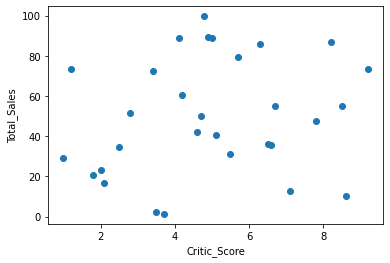

In [6]:
# Inspect the relationship of Critic_Score and Total_Sales
plt.scatter(df1.Critic_Score, df1.Total_Sales)
plt.xlabel('Critic_Score')
plt.ylabel('Total_Sales')
plt.show()

In [7]:
X = df1.Critic_Score.values.reshape(-1, 1)

In [16]:
# Inspect X
print(X[:5])
print("-------")
print(f'X.shape: {X.shape}')

[[1.8]
 [2.1]
 [4.6]
 [7.1]
 [4.9]]
-------
X.shape: (30, 1)


In [10]:
# Assign target variable
y = df1.Total_Sales

In [11]:
# Prediction
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(30,)


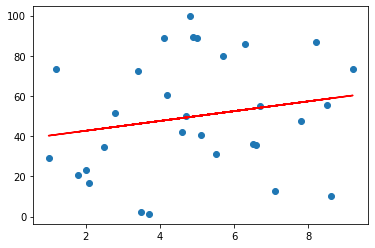

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [13]:
print(f'slope: {model.coef_}')
print(f'y-intercept: {model.intercept_}')

slope: [2.44340259]
y-intercept: 37.8044025664912


## 2. Neural Network Model
### Sales based on Genre: 
Which genre is more likely to be popular in year 2023?